<a href="https://colab.research.google.com/github/HarikrishnanK9/Pneumonia_Detection/blob/main/Pneumonia_Detection_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp '/content/drive/MyDrive/Phneumonia/xray.zip' '/content'

In [ ]:
!unzip xray.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
import cv2

In [ ]:
dataset_path = '/content/chest_xray/chest_xray'

In [ ]:
batch_size =16
epochs=10
input_shape = (256,256,3)
num_classes = 2


In [ ]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                  )



In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:

training_generator = train_datagen.flow_from_directory(
    '/content/chest_xray/chest_xray/train' ,
    target_size=(256,256),
    batch_size=16,
    class_mode='binary'
    )

Found 5216 images belonging to 2 classes.


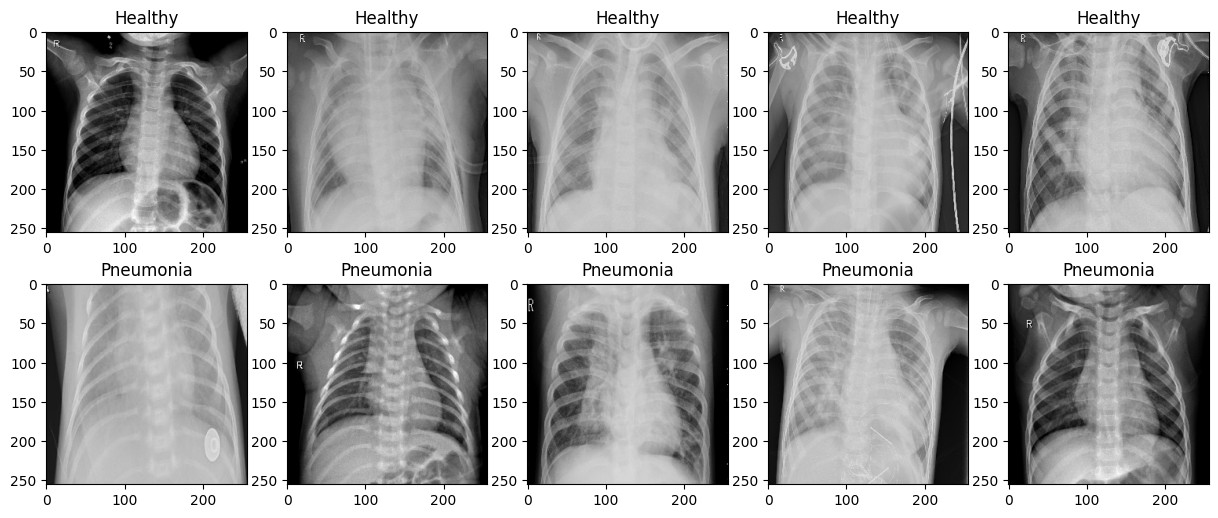

In [ ]:

num_images_to_display = 5
healthy_images, _ = training_generator.next()
pneumonia_images, _ = training_generator.next()
plt.figure(figsize=(15, 6))
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(healthy_images[i])
    plt.title("Healthy")

    plt.subplot(2, num_images_to_display, num_images_to_display + i + 1)
    plt.imshow(pneumonia_images[i])
    plt.title("Pneumonia")

In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/chest_xray/chest_xray/val' ,
    target_size=(256,256),
    batch_size=16,
    class_mode='binary',
    )

Found 16 images belonging to 2 classes.


In [ ]:
testing_generator = validation_datagen.flow_from_directory(
    '/content/chest_xray/test' ,
    target_size=(256,256),
    batch_size=16,
    class_mode='binary',
    )

Found 624 images belonging to 2 classes.


In [ ]:
# Train the model
history = model.fit(
    training_generator,
    steps_per_epoch=training_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
326/326 [==============================] - 74s 187ms/step - loss: 0.2750 - accuracy: 0.8869 - val_loss: 0.8267 - val_accuracy: 0.7500
Epoch 2/10
326/326 [==============================] - 59s 182ms/step - loss: 0.1161 - accuracy: 0.9557 - val_loss: 0.4370 - val_accuracy: 0.8750
Epoch 3/10
326/326 [==============================] - 52s 161ms/step - loss: 0.0947 - accuracy: 0.9674 - val_loss: 0.4986 - val_accuracy: 0.6875
Epoch 4/10
326/326 [==============================] - 54s 165ms/step - loss: 0.0680 - accuracy: 0.9739 - val_loss: 0.1603 - val_accuracy: 0.8750
Epoch 5/10
326/326 [==============================] - 55s 168ms/step - loss: 0.0550 - accuracy: 0.9810 - val_loss: 0.1669 - val_accuracy: 0.9375
Epoch 6/10
326/326 [==============================] - 55s 168ms/step - loss: 0.0471 - accuracy: 0.9816 - val_loss: 0.6200 - val_accuracy: 0.8750
Epoch 7/10
326/326 [==============================] - 53s 163ms/step - loss: 0.0563 - accuracy: 0.9787 - val_loss: 0.0763 - val_ac

In [ ]:
#evaluate the model
test_loss, test_accuracy = model.evaluate(testing_generator)
print(f'Accuracy on the test set: {test_accuracy * 100:.2f}%')

39/39 [==============================] - 5s 124ms/step - loss: 2.4178 - accuracy: 0.7260
Accuracy on the test set: 72.60%


In [ ]:
from tensorflow.keras.preprocessing import image
def predict_image(image_path): #
    img = image.load_img(image_path,target_size = input_shape) #
    img = image.img_to_array(img) #converting to array
    img = np.expand_dims(img,axis=0)  #expanding dims to match for model
    img /=255.0 #normalize
    prediction = model.predict(img)
    predicted_condition_index = np.argmax(prediction)

    return predicted_condition_index

In [ ]:
img = '/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg'

In [ ]:
# Dictionary mapping species indices to species names
disease_mapping = {
    0: 'Pneumonia',
    1: 'Normal',
}

# Example usage to identify the species from the predicted index
predicted_condition_index = predict_image(img)  # Replace this with the actual predicted index
predicted_condition_name = disease_mapping.get(predicted_condition_index, 'Unknown')

print(f'Predicted condition: {predicted_condition_name}')


1/1 [==============================] - 0s 17ms/step
Predicted condition: Pneumonia


In [ ]:
model.save('pneumonia.h5')

In [ ]:
!cp '/content/pneumonia.h5' '/content/drive/MyDrive/Phneumonia'

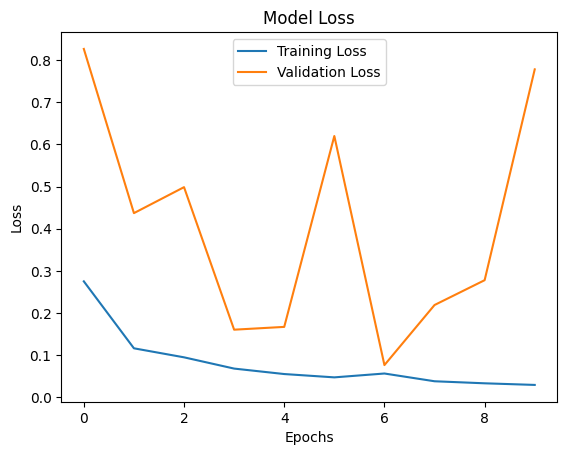

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


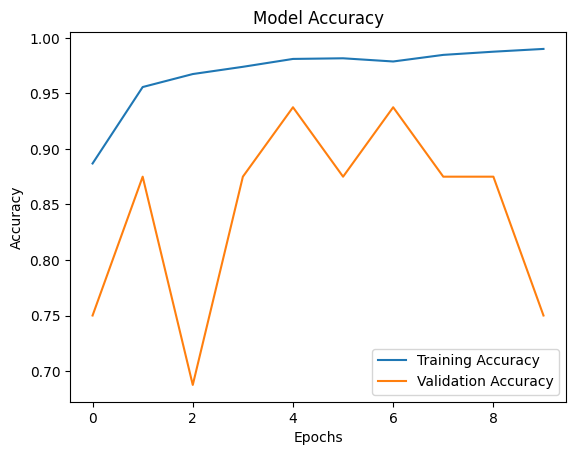

In [ ]:

# Plotting training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# Get the true labels
num_samples = len(testing_generator.filenames)
num_classes = len(testing_generator.class_indices)
y_true = testing_generator.classes

# Make predictions
y_pred_probs = model.predict(testing_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

39/39 [==============================] - 5s 138ms/step


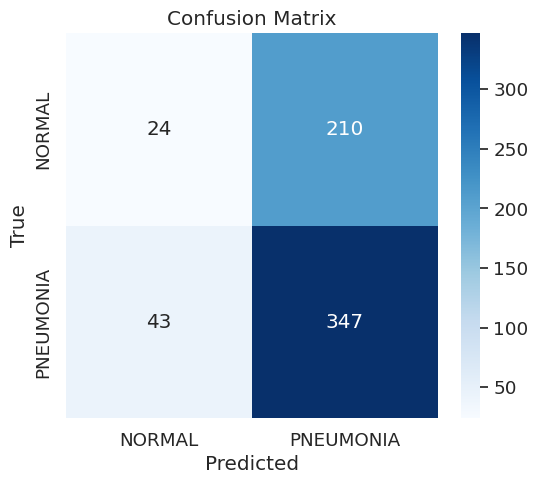

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Calculate the confusion matrix
confusion = confusion_matrix(y_true,y_pred)
# Define class labels
class_labels = ['NORMAL','PNEUMONIA']
# Create a heatmap
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_true,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.10      0.16       234
           1       0.62      0.89      0.73       390

    accuracy                           0.59       624
   macro avg       0.49      0.50      0.45       624
weighted avg       0.52      0.59      0.52       624



In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

In [ ]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history1 = model1.fit(
    training_generator,
    steps_per_epoch=training_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/20
326/326 [==============================] - 56s 167ms/step - loss: 0.3202 - accuracy: 0.8813 - val_loss: 0.6968 - val_accuracy: 0.6250
Epoch 2/20
326/326 [==============================] - 53s 162ms/step - loss: 0.1280 - accuracy: 0.9536 - val_loss: 0.8539 - val_accuracy: 0.7500
Epoch 3/20
326/326 [==============================] - 54s 165ms/step - loss: 0.0870 - accuracy: 0.9678 - val_loss: 0.5007 - val_accuracy: 0.6875
Epoch 4/20
326/326 [==============================] - 53s 164ms/step - loss: 0.0723 - accuracy: 0.9741 - val_loss: 1.0566 - val_accuracy: 0.6875
Epoch 5/20
326/326 [==============================] - 53s 162ms/step - loss: 0.0637 - accuracy: 0.9766 - val_loss: 0.1833 - val_accuracy: 0.9375
Epoch 6/20
326/326 [==============================] - 54s 166ms/step - loss: 0.0479 - accuracy: 0.9810 - val_loss: 0.4251 - val_accuracy: 0.7500
Epoch 7/20
326/326 [==============================] - 53s 162ms/step - loss: 0.0405 - accuracy: 0.9845 - val_loss: 0.0799 - val_ac

In [ ]:
#evaluate the model
test_loss, test_accuracy = model1.evaluate(testing_generator)
print(f'Accuracy on the test set: {test_accuracy * 100:.2f}%')

39/39 [==============================] - 5s 136ms/step - loss: 4.5738 - accuracy: 0.7452
Accuracy on the test set: 74.52%


In [ ]:
model1.save('pneumonia1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp '/content/pneumonia1.h5' '/content/drive/MyDrive/Phneumonia'

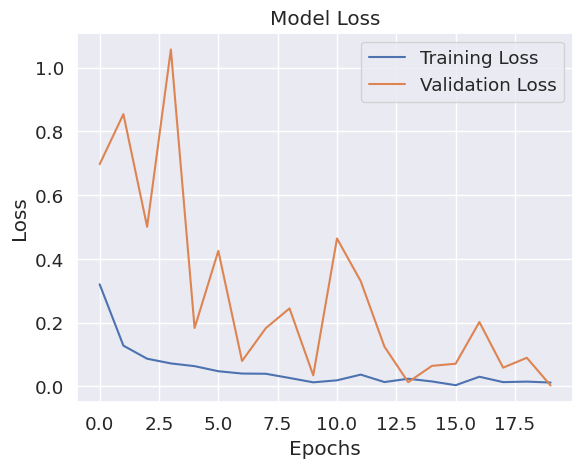

In [ ]:

plt.plot(history1.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history1.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


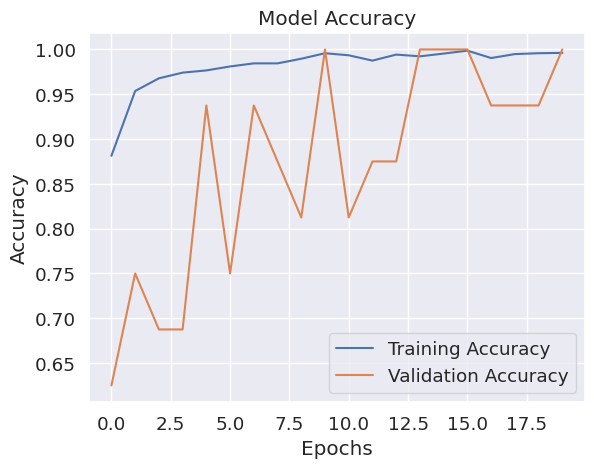

In [ ]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
history2 = model2.fit(
    training_generator,
    steps_per_epoch=training_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping])

Epoch 1/30
326/326 [==============================] - 53s 163ms/step - loss: 0.1170 - accuracy: 0.9571 - val_loss: 0.3448 - val_accuracy: 0.8750
Epoch 2/30
326/326 [==============================] - 55s 168ms/step - loss: 0.0895 - accuracy: 0.9678 - val_loss: 0.1365 - val_accuracy: 0.9375
Epoch 3/30
326/326 [==============================] - 54s 167ms/step - loss: 0.0712 - accuracy: 0.9714 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 4/30
326/326 [==============================] - 53s 162ms/step - loss: 0.0614 - accuracy: 0.9783 - val_loss: 0.0734 - val_accuracy: 0.9375
Epoch 5/30
326/326 [==============================] - 53s 162ms/step - loss: 0.0492 - accuracy: 0.9806 - val_loss: 0.1166 - val_accuracy: 0.9375
Epoch 6/30
326/326 [==============================] - 55s 168ms/step - loss: 0.0431 - accuracy: 0.9843 - val_loss: 0.8062 - val_accuracy: 0.8125
Epoch 7/30
326/326 [==============================] - 53s 163ms/step - loss: 0.0463 - accuracy: 0.9827 - val_loss: 0.1672 - val_ac

In [ ]:
test_loss, test_accuracy = model2.evaluate(testing_generator)
print(f'Accuracy on the test set: {test_accuracy * 100:.2f}%')

39/39 [==============================] - 7s 174ms/step - loss: 1.3106 - accuracy: 0.7500
Accuracy on the test set: 75.00%


In [ ]:
model2.save('pneumonia2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp '/content/pneumonia2.h5' '/content/drive/MyDrive/Phneumonia'

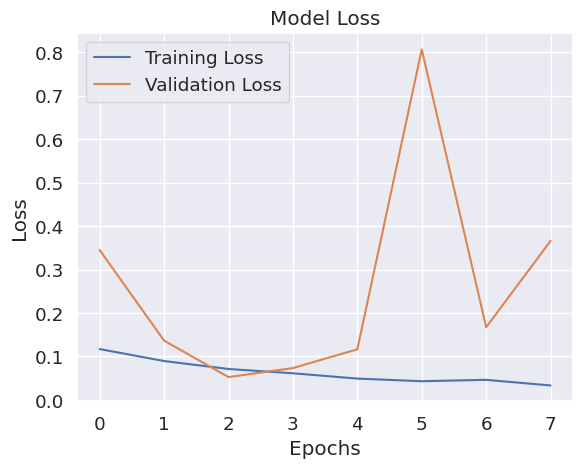

In [ ]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


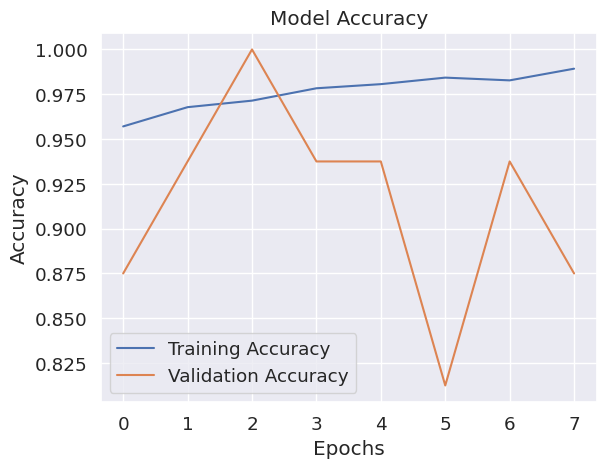

In [ ]:
plt.plot(history2.history['accuracy'], label='Training Accuracy')

plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# Get the true labels
num_samples = len(testing_generator.filenames)
num_classes = len(testing_generator.class_indices)
y_true = testing_generator.classes

# Make predictions
y_pred_probs2 = model2.predict(testing_generator)
y_pred2 = np.argmax(y_pred_probs2, axis=1)

39/39 [==============================] - 6s 141ms/step


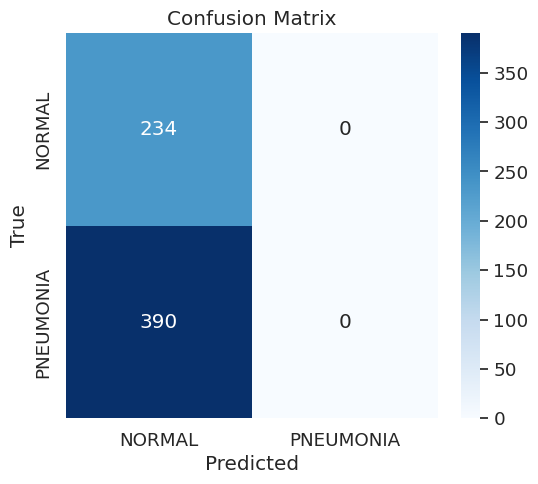

In [ ]:
confusion = confusion_matrix(y_true,y_pred2)
class_labels = ['NORMAL','PNEUMONIA']
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten


base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model3 = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history3 = model3.fit(
    training_generator,
    steps_per_epoch=training_generator.samples // 16,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 16,
    )

Epoch 1/10
326/326 [==============================] - 61s 185ms/step - loss: 0.1297 - accuracy: 0.9563 - val_loss: 0.6953 - val_accuracy: 0.6875
Epoch 2/10
326/326 [==============================] - 57s 176ms/step - loss: 0.0435 - accuracy: 0.9833 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 3/10
326/326 [==============================] - 57s 176ms/step - loss: 0.0276 - accuracy: 0.9891 - val_loss: 0.0790 - val_accuracy: 0.9375
Epoch 4/10
326/326 [==============================] - 59s 181ms/step - loss: 0.0153 - accuracy: 0.9956 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 5/10
326/326 [==============================] - 58s 179ms/step - loss: 0.0160 - accuracy: 0.9937 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 6/10
326/326 [==============================] - 59s 181ms/step - loss: 0.0081 - accuracy: 0.9967 - val_loss: 0.1514 - val_accuracy: 0.8750
Epoch 7/10
326/326 [==============================] - 57s 174ms/step - loss: 0.0070 - accuracy: 0.9975 - val_loss: 0.0047 - val_ac

In [ ]:
model3.save('pneumonia3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp '/content/pneumonia3.h5' '/content/drive/MyDrive/Phneumonia'

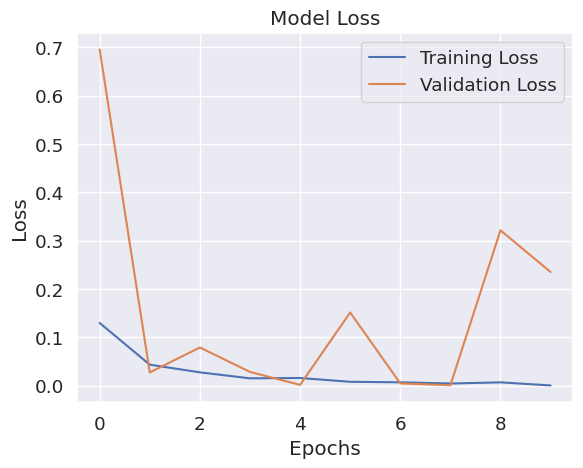

In [ ]:
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


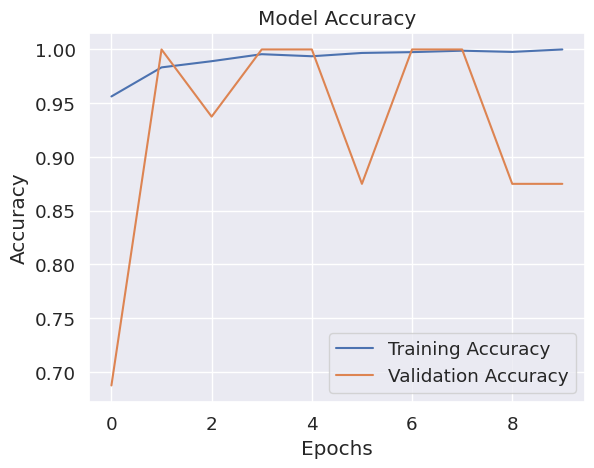

In [ ]:
plt.plot(history3.history['accuracy'], label='Training Accuracy')

plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# Get the true labels
num_samples = len(testing_generator.filenames)
num_classes = len(testing_generator.class_indices)
y_true = testing_generator.classes

# Make predictions
y_pred_probs3 = model3.predict(testing_generator)
y_pred3 = np.argmax(y_pred_probs3, axis=1)

39/39 [==============================] - 6s 146ms/step


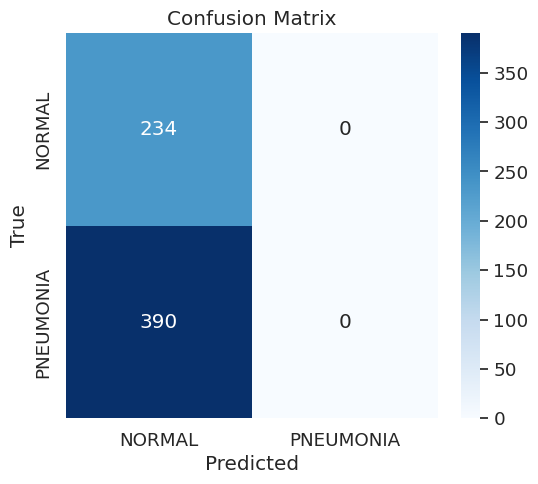

In [ ]:
confusion = confusion_matrix(y_true,y_pred3)
class_labels = ['NORMAL','PNEUMONIA']
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
history4 = model3.fit(
    training_generator,
    steps_per_epoch=training_generator.samples // 16,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 16,
    )

Epoch 1/20
326/326 [==============================] - 58s 178ms/step - loss: 7.4419e-04 - accuracy: 0.9998 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 2/20
326/326 [==============================] - 57s 176ms/step - loss: 2.0049e-04 - accuracy: 1.0000 - val_loss: 0.1748 - val_accuracy: 0.8750
Epoch 3/20
326/326 [==============================] - 58s 177ms/step - loss: 1.4419e-04 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9375
Epoch 4/20
326/326 [==============================] - 58s 179ms/step - loss: 1.1959e-04 - accuracy: 1.0000 - val_loss: 0.1315 - val_accuracy: 0.9375
Epoch 5/20
326/326 [==============================] - 57s 174ms/step - loss: 9.8273e-05 - accuracy: 1.0000 - val_loss: 0.1735 - val_accuracy: 0.9375
Epoch 6/20
326/326 [==============================] - 58s 176ms/step - loss: 7.8453e-05 - accuracy: 1.0000 - val_loss: 0.1160 - val_accuracy: 0.9375
Epoch 7/20
326/326 [==============================] - 58s 177ms/step - loss: 6.9595e-05 - accuracy: 1.0000

In [ ]:
model4.save('pneumonia4.h5')

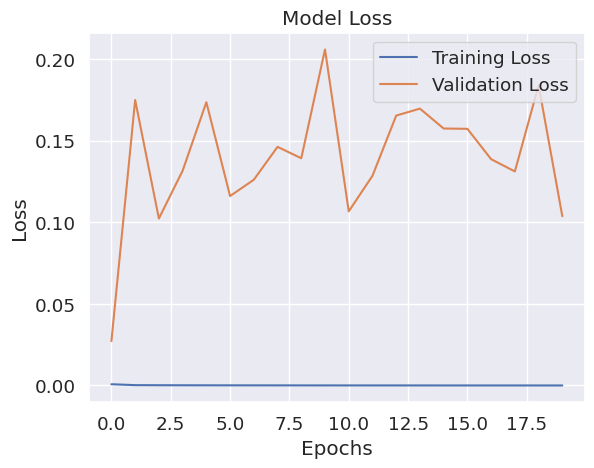

In [ ]:
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


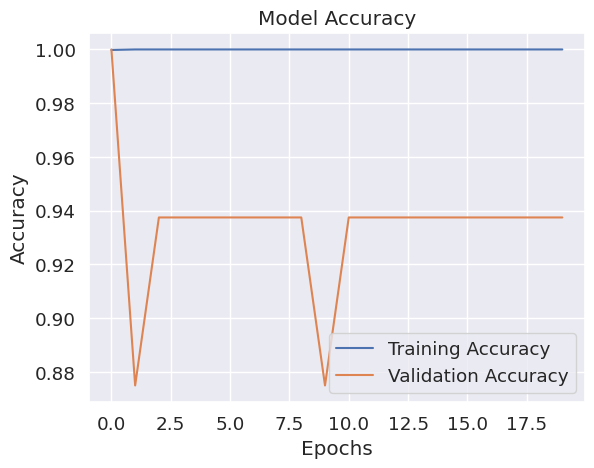

In [ ]:
plt.plot(history4.history['accuracy'], label='Training Accuracy')

plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
